In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
import graphviz

%matplotlib inline
plt.style.use('seaborn-whitegrid')
plt.rcParams['font.size'] = '16'
#sns.set_theme('seaborn-whitegrid')

fname = "./catalog/fulldata.csv"
jplusColours = pd.read_csv(fname, index_col='id')

jplusColours.label.replace([1, 2], ["ssp","star"], inplace=True)

In [2]:
def decTree(dataset, features, depth=None):
    X = dataset[features]
    y = dataset["label"]
    
    xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.4, random_state = 0)
    
    model = DecisionTreeClassifier(max_depth=depth)
    model.fit(xtrain, ytrain)
    scores = cross_val_score(model, xtest, ytest, cv=5)
    
    return model, scores

def forest(dataset, features, depth=None):
    
    X = dataset[features]
    y = dataset["label"]
    
    xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.4, random_state = 0)
    model = RandomForestClassifier()
    model.fit(xtrain, ytrain)
    scores = cross_val_score(model, xtest, ytest, cv=5)
    
    return model, scores

In [4]:
features = ['u-r', 'J378-r', 'J395-r', 'J410-r', 'J430-r', 'g-r', 'J515-r', 'r-J660', 'r-i', 'r-J861', 'r-z']

jplusCut = jplusColours[(jplusColours["g-r"] > 0.1) & (jplusColours["g-r"] < 1.0)]

ndep = np.arange(1,15)
tsc = np.zeros([14,2])
fsc = np.zeros([14,2])
for i in ndep:
    #print("Depth = ", i)
    tmodel, tscores = decTree(jplusCut, features, i)
    tsc[i-1, :] = [tscores.mean(), tscores.std()]
    fmodel, fscores = forest(jplusCut, features, i)
    fsc[i-1, :] = [fscores.mean(), fscores.std()]

<ErrorbarContainer object of 3 artists>

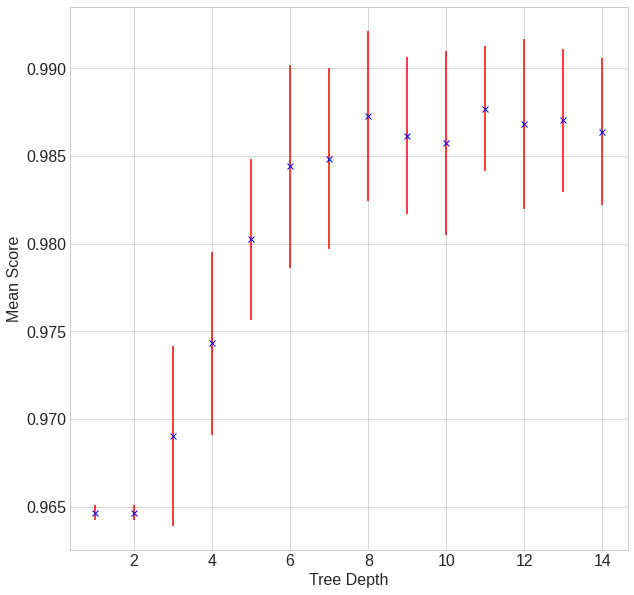

In [5]:
plt.figure(figsize=(10,10))
plt.xlabel("Tree Depth")
plt.ylabel("Mean Score")
plt.errorbar(x=ndep, y=tsc[:,0], yerr=tsc[:,1], fmt="bx", ecolor="r")

<ErrorbarContainer object of 3 artists>

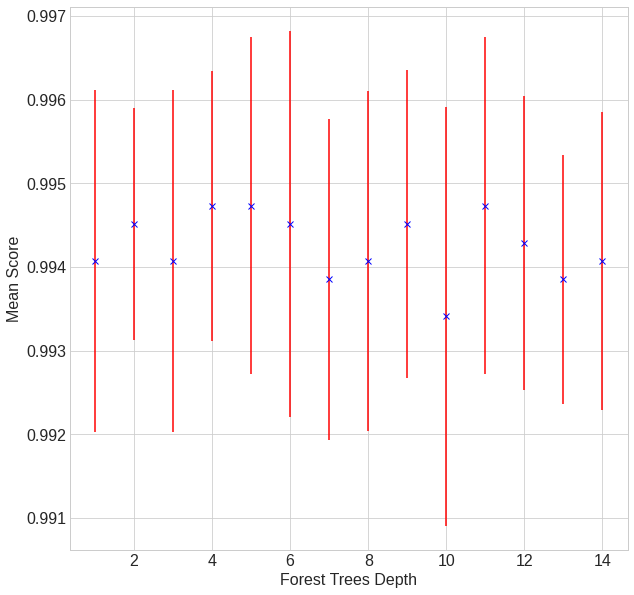

In [6]:
plt.figure(figsize=(10,10))
plt.xlabel("Forest Trees Depth")
plt.ylabel("Mean Score")
plt.errorbar(x=ndep, y=fsc[:,0], yerr=fsc[:,1], fmt="bx", ecolor="r")